## Data Loading and Preprocessing

### Libraries Used
The following libraries are essential for data manipulation, visualization, and text analysis:
- `pandas` for data manipulation.
- `re` for regular expressions (used later in the project).
- `matplotlib.pyplot` and `seaborn` for data visualization.
- `sklearn.feature_extraction.text.CountVectorizer` for text analysis and feature extraction.

### Steps

1. **Importing Libraries**  
   The necessary Python libraries are imported at the beginning to handle various tasks such as:
   - Reading and processing the dataset.
   - Renaming columns for clarity.
   - Performing text analysis using `CountVectorizer`.

2. **Loading the Dataset**  
   The dataset containing web-scraped job postings (`webscraping_results_assignment3.csv`) is loaded into a DataFrame named `results`.

   ```python
   filename_data = './webscraping_results_assignment3.csv'
   results = pd.read_csv(filename_data)


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
filename_data = './webscraping_results.csv'
results = pd.read_csv(filename_data)

# Rename columns
results.rename(columns={'Job_Title': 'Title', 'Company_Name': 'Company', 'Job_Description': 'Description'}, inplace=True)


## Text Analysis and N-Gram Extraction

This section combines all job descriptions into a single text corpus for analysis. Using N-gram extraction, the most frequently mentioned words and phrases (unigrams, bigrams, and trigrams) are identified to understand the key skill requirements in job postings.

### Steps

1. **Combine Job Descriptions into a Corpus**  
   All job descriptions are aggregated into a single text corpus. The text is converted to lowercase to ensure uniformity during analysis.

   ```python
   corpus = ' '.join(results['Description'].dropna()).lower()


In [4]:
# Combine all job descriptions into one text corpus
corpus = ' '.join(results['Description'].dropna()).lower()

# Define a function to extract N-grams
def extract_ngrams(corpus, n=1, top_n=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform([corpus])
    ngram_counts = ngram_matrix.toarray().sum(axis=0)
    ngram_features = vectorizer.get_feature_names_out()

    # Combine N-grams with their frequencies
    ngram_freq = pd.DataFrame({
        'N-gram': ngram_features,
        'Frequency': ngram_counts
    }).sort_values(by='Frequency', ascending=False)

    return ngram_freq.head(top_n)

# Extract and display unigrams, bigrams, and trigrams
print("Top 20 Unigrams:")
print(extract_ngrams(corpus, n=1, top_n=20))

print("\nTop 20 Bigrams:")
print(extract_ngrams(corpus, n=2, top_n=20))

Top 20 Unigrams:
             N-gram  Frequency
4994           data      10817
6828     experience       5938
3087       business       5819
18238          work       4894
16585          team       3737
15486        skills       2991
10455    management       2454
16306       support       2411
1746       analysis       2266
5361    development       2194
15635     solutions       2159
1045        ability       2073
9958       learning       1936
14313  requirements       1903
8866      including       1886
16130        strong       1851
14631          role       1829
9767      knowledge       1748
13115       process       1716
16598     technical       1693

Top 20 Bigrams:
                       N-gram  Frequency
127689       machine learning       1164
54895            data science        761
53939           data analysis        669
236090       years experience        592
164466        problem solving        533
41533    communication skills        512
44458        computer scienc

## Categorization of Skills

In this section, skills extracted from the job descriptions are categorized into four key groups: **sskills**, **tskills**, **bskills**, and **pskills**. This categorization helps organize the identified skills into technical, analytical, business, and personal skill sets, providing clarity and aiding further analysis.


In [5]:
sskills = {
    'Python': [], 'Java': [], 'R': [], 'SQL': [],
    'Data Analytics': [], 'Data Visualization': [], 'Tableau': [],
    'Power BI': [], 'Excel': [], 'Machine Learning': [], 'Deep Learning': [],
    'TensorFlow': [], 'PyTorch': [], 'Scikit-learn': [],
    'Computer Vision': [], 'Natural Language Processing': [],
    'Hadoop': [], 'Spark': [], 'AWS': [], 'GCP': [],
    'MySQL': [], 'PostgreSQL': [],
    'ETL Processes': [], 'Airflow': [], 'Kubernetes': [],
    'Pandas': [], 'NumPy': [], 'Matplotlib': [], 'Seaborn': [],
    'Azure': [], 'BigQuery': []
}
tskills = {
    'Statistical Modeling': [], 'Hypothesis Testing': [], 'Problem Solving': [],
    'Cross-Functional Teams': [], 'Data Wrangling': [], 'Feature Engineering': [],
    'Data Governance': []
}
bskills = {
    'Communication Skills': [], 'Collaboration Skills': [],
    'Agile': [], 'Scrum': [],
    'Stakeholder Communication': [],
    'Business Intelligence Tools': []
}
pskills = {
    'Work Independently': [], 'Teamwork': [],
    'Creativity': [], 'Strategic Thinking': [], 'Decision Making': [],
    'Time Management': [], 'Adaptability': [], 'Critical Thinking': []
}


In [6]:
# Assuming 'results' is a DataFrame containing the job descriptions in a column named 'Description'
# Replace `results` with the actual DataFrame variable name
for _, row in results.iterrows():
    cleantext = str(row["Description"]).lower()

    # Populate skill categories based on the presence of keywords in job descriptions
    for skill in sskills.keys():
        sskills[skill].append(1 if skill.lower() in cleantext else 0)
    for skill in tskills.keys():
        tskills[skill].append(1 if skill.lower() in cleantext else 0)
    for skill in bskills.keys():
        bskills[skill].append(1 if skill.lower() in cleantext else 0)
    for skill in pskills.keys():
        pskills[skill].append(1 if skill.lower() in cleantext else 0)

## Combining Extracted Skills into a Unified DataFrame

This section consolidates the extracted skills (from the `sskills`, `tskills`, `bskills`, and `pskills` categories) with the original job posting data into a single DataFrame for further analysis. The unified DataFrame allows for easier exploration and visualization of relationships between job postings and the required skill sets.


In [7]:
# Combine extracted skills into a DataFrame
df1 = results[['Title', 'Company', 'Location', 'Description']].copy()
df2 = pd.DataFrame(sskills)
df3 = pd.DataFrame(tskills)
df4 = pd.DataFrame(bskills)
df5 = pd.DataFrame(pskills)
combined_df = pd.concat([df1, df2, df3, df4, df5], axis=1)

In [8]:
combined_df.head(5)

,Title,Company,Location,Description,Python,Java,R,SQL,Data Analytics,Data Visualization,...,Stakeholder Communication,Business Intelligence Tools,Work Independently,Teamwork,Creativity,Strategic Thinking,Decision Making,Time Management,Adaptability,Critical Thinking
0,Data Scientist - AI Trainer,DataAnnotation,"Remote in Brantford, ON",We are looking for a data scientist to join ou...,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Senior Data Scientist,Indeed,Remote,Our Mission\nAs the world’s number 1 job site*...,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Data Scientist and Developer,Tula Foundation,"Victoria, BC",About the Tula Foundation\nThe Tula Foundation...,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Continuing Faculty- Artificial Intelligence & ...,University Canada West,"Vancouver, BC",University Canada West: Faculty of Business: B...,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist (Remote),Verifino GmbH & Co. KG,"Remote in Toronto, ON",Job Category:\nTechnology\nPay Grade Range:\n$...,1,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0


## Preparing Skills Data for Analysis and Saving Results

In this section, the skills data is converted into a numeric 2D array for further analysis, and the enriched dataset is saved to a CSV file for downstream processing and visualization.


In [9]:
# Save skills as 2D array
df = combined_df.iloc[:, 4:]
df_summary = df.apply(pd.to_numeric)
a = df_summary.values

# Display results
print("Number of job postings:", a.shape[0])
print(a)

# Save the result to a new CSV for further analysis
combined_df.to_csv('./Processed_Job_Postings.csv', index=False)

Number of job postings: 1276
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [11]:
# Convert extracted skills to numeric for analysis
skills_matrix = combined_df.iloc[:, 4:].apply(pd.to_numeric)

## Visualizations: Insights from Job Descriptions

This section provides key visualizations to uncover patterns and trends in the job postings, focusing on skill frequencies, job locations, skill co-occurrences, and skills mentioned per posting.

---

### 1. Frequency of Top 15 Skills
The first visualization identifies the most frequently mentioned skills in the job descriptions, providing a clear view of industry demand.


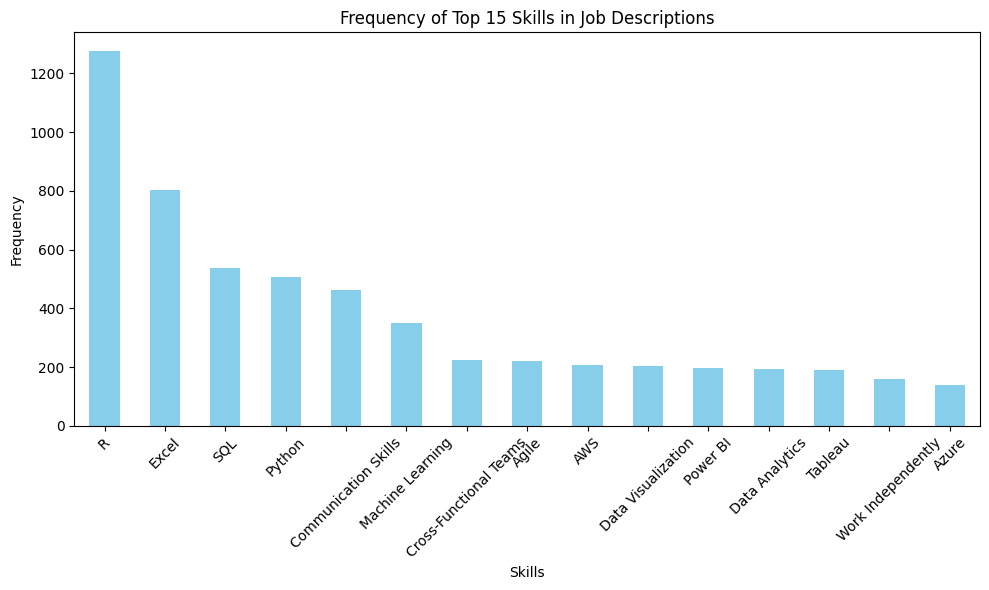

In [12]:
# Visualization: Frequency of top 15 skills
skill_frequencies = skills_matrix.sum().sort_values(ascending=False).head(15)  # Select top 15 skills
plt.figure(figsize=(10, 6))
skill_frequencies.plot(kind='bar', color='skyblue')
plt.title("Frequency of Top 15 Skills in Job Descriptions")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Job Postings by Location (Top 10)
This visualization highlights the distribution of job postings across the top 10 locations, providing insights into geographical trends in the job market.

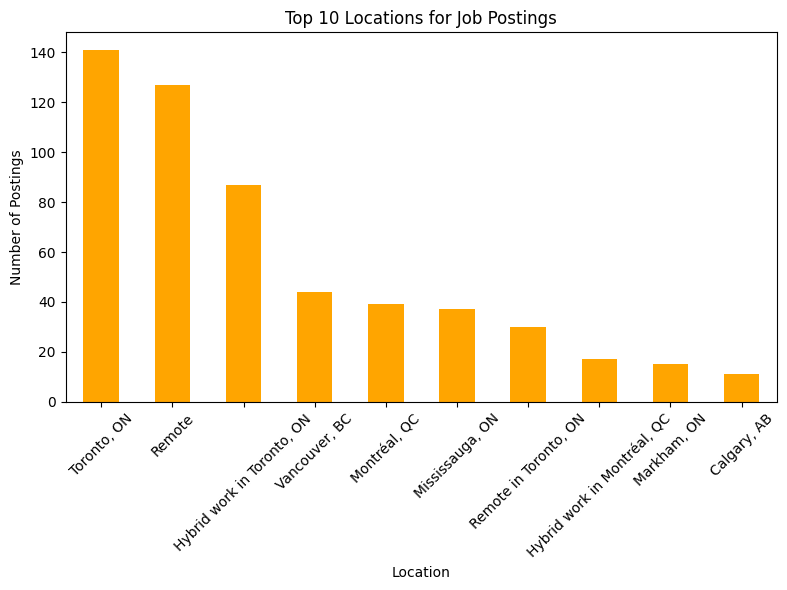

In [13]:
# Visualization: Job postings by location (Top 10)
location_counts = combined_df['Location'].value_counts().head(10)  # Top 10 locations
plt.figure(figsize=(8, 6))
location_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Locations for Job Postings")
plt.xlabel("Location")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. Co-Occurrence Heatmap of Top 15 Skills
This heatmap shows how frequently the top 15 skills appear together in job postings, helping identify relationships and groupings among skills.

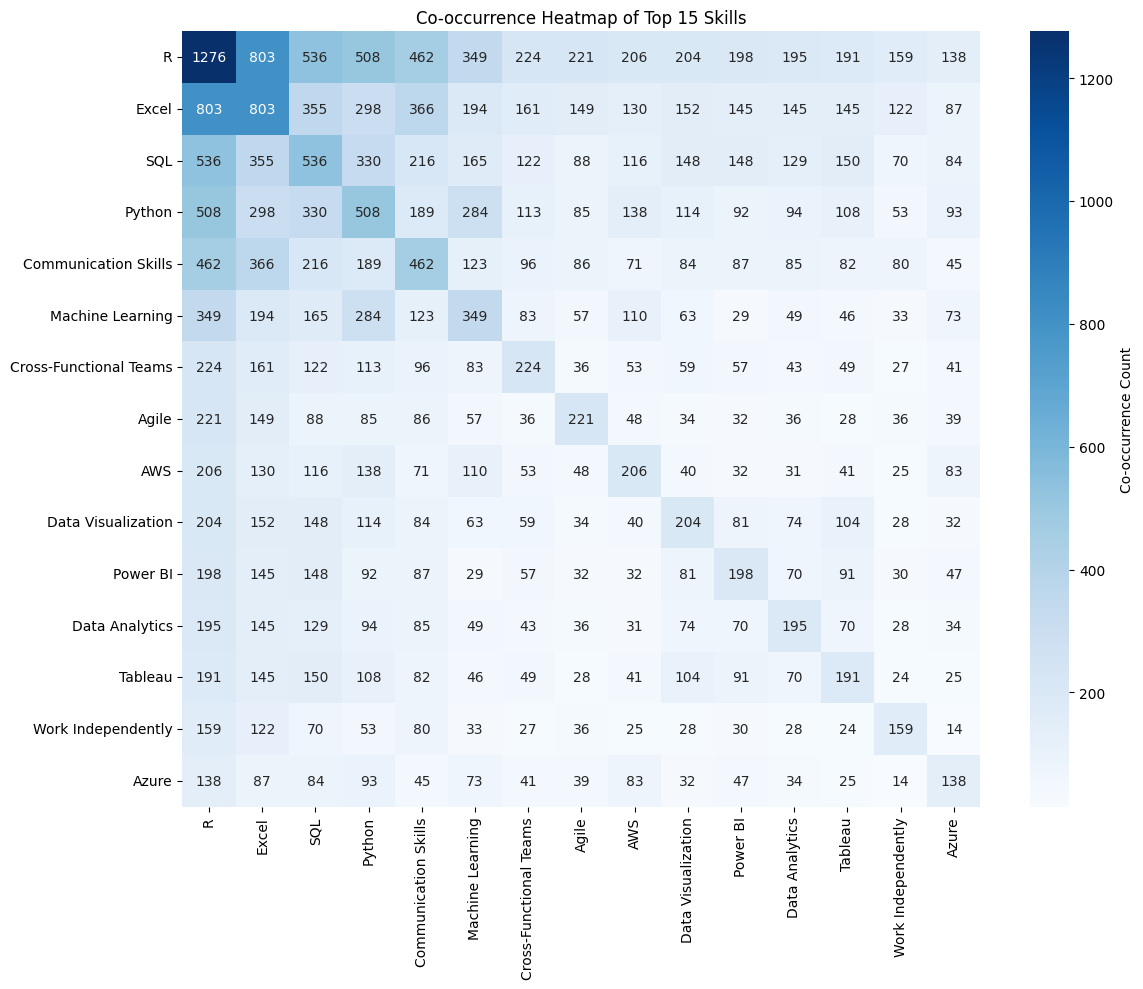

In [14]:

# Visualization: Co-occurrence heatmap of top 15 skills
top_15_skills = skill_frequencies.index
co_occurrence_matrix = skills_matrix[top_15_skills].T.dot(skills_matrix[top_15_skills])  # Filter for top 15 skills
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Co-occurrence Count'})
plt.title("Co-occurrence Heatmap of Top 15 Skills")
plt.tight_layout()
plt.show()

In [16]:
location_counts

Location
Toronto, ON                    141
Remote                         127
Hybrid work in Toronto, ON      87
Vancouver, BC                   44
Montréal, QC                    39
Mississauga, ON                 37
Remote in Toronto, ON           30
Hybrid work in Montréal, QC     17
Markham, ON                     15
Calgary, AB                     11
Name: count, dtype: int64

### 4. Skills Mentioned Per Job Posting
This histogram visualizes the number of distinct skills mentioned in each job posting, offering insights into the breadth of skill requirements.

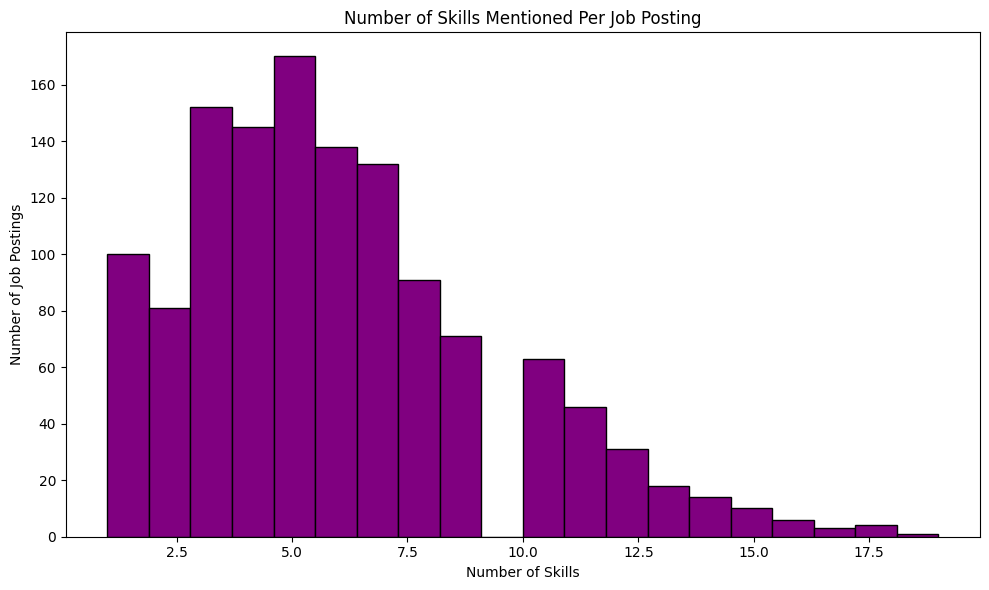

In [19]:
# Calculate the total number of skills mentioned in each job posting
skills_per_posting = skills_matrix.sum(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(skills_per_posting, bins=20, color='purple', edgecolor='black')
plt.title("Number of Skills Mentioned Per Job Posting")
plt.xlabel("Number of Skills")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()



In [21]:
df_summary

,Python,Java,R,SQL,Data Analytics,Data Visualization,Tableau,Power BI,Excel,Machine Learning,...,Stakeholder Communication,Business Intelligence Tools,Work Independently,Teamwork,Creativity,Strategic Thinking,Decision Making,Time Management,Adaptability,Critical Thinking
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1272,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1273,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1274,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Hierarchical Clustering and Dendrogram Visualization

### Overview
This section applies hierarchical clustering to the skill data to identify natural groupings of skills, helping guide the design of course modules. A dendrogram is generated to visually represent the clustering structure and relationships between skills.

### Steps

1. **Create a Distance Matrix**  
   - The pairwise distance matrix is calculated using the **cosine similarity** metric, which is effective for high-dimensional data like skills.
   - `pdist` calculates the distances, and `squareform` converts the result into a symmetric matrix for clustering.
   ```python
   D = squareform(pdist(df_summary.T, metric='cosine'))
   
2. **Perform Hierarchical Clustering**
    - Hierarchical clustering is performed using the centroid linkage method.
    - Other linkage methods, such as complete and average, can also be tried for comparison.

3. **Plot the Dendrogram**
   - A dendrogram is plotted to visualize the hierarchical clustering results.
   - The skills are labeled on the dendrogram for easy interpretation.

4. **Save the Dendrogram**
   - The dendrogram is saved as a PNG file (dendrogram.png) for documentation and sharing.

5. **Interpret Clusters**
   - The dendrogram and the linkage matrix (Y) are used to design logical course groupings.
   - Skills that are clustered together naturally suggest topics or modules for course development.


/var/folders/mg/l5f3xml94wjb2ks03kfgl9840000gn/T/ipykernel_18303/4061996679.py:11: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method='centroid')


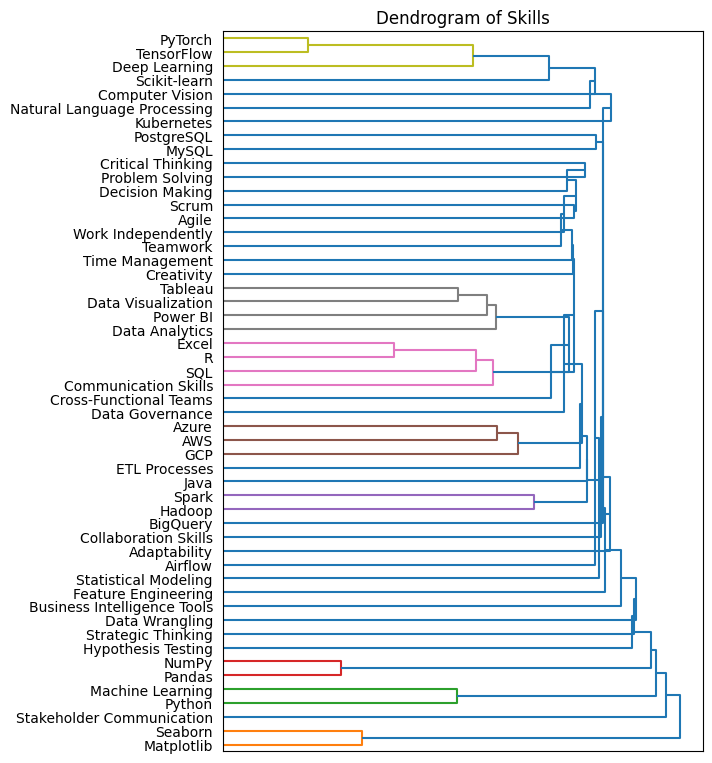

In [22]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Create a distance matrix (use cosine or Euclidean distance)
D = squareform(pdist(df_summary.T, metric='cosine'))

# Perform hierarchical clustering
# Try different linkage methods (complete, average, centroid)
Y = sch.linkage(D, method='centroid')

# Plot the dendrogram
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.1, 0.1, 0.4, 0.6])

Z = sch.dendrogram(Y, orientation='right', labels=df_summary.columns, leaf_font_size=10)
ax.set_xticks([])
ax.set_yticklabels(df_summary.columns[Z['leaves']])

# Save the dendrogram
plt.title('Dendrogram of Skills')
plt.savefig('dendrogram.png', format='png', bbox_inches='tight')
plt.show()

# Interpret clusters
# Use the linkage matrix (Y) and dendrogram to design your course curriculum.


6. **Hierarchical Clustering with Distance Threshold**
- This section refines the dendrogram by adding a distance threshold to determine the optimal clustering level. The goal is to group similar skills into meaningful clusters for curriculum design.


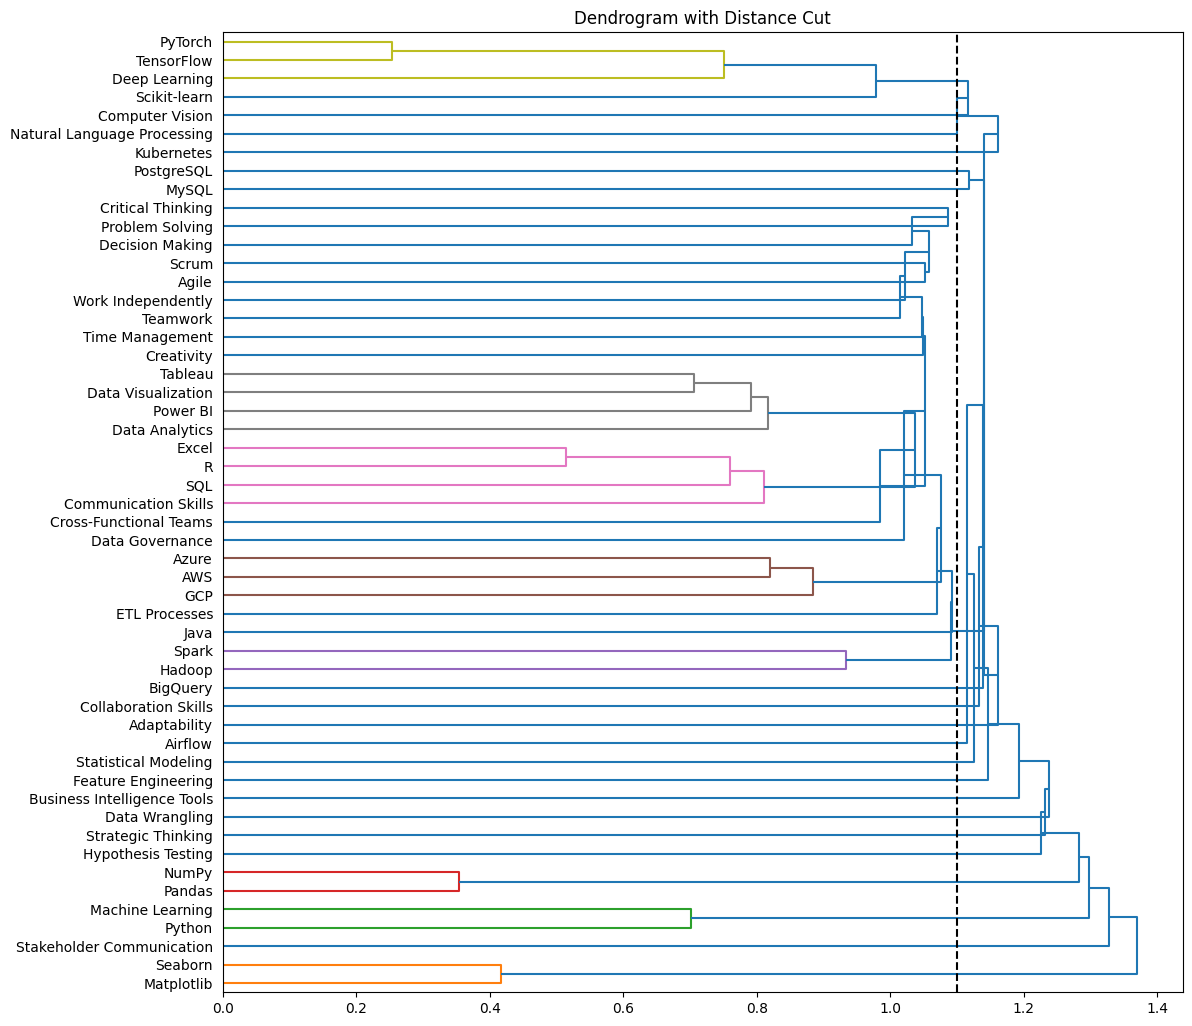

In [23]:
# Define the maximum distance threshold for cutting the dendrogram
max_d = 1.1  # Adjust this value as needed

# Plot the dendrogram
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
Z = sch.dendrogram(Y, orientation='right', labels=df_summary.columns, leaf_font_size=10)

# Add a vertical line at the selected distance level
plt.axvline(x=max_d * D.max(), c='k', linestyle='--')

# Save and display the dendrogram
plt.title('Dendrogram with Distance Cut')
plt.savefig('dendrogram_cut.png', format='png', bbox_inches='tight')
plt.show()


7. **Identifying Clusters and Grouping Skills**
- This section extracts skill clusters from the dendrogram based on a selected distance threshold, grouping similar skills into meaningful clusters.



In [24]:
# Identify clusters with the selected distance level
lbs = sch.fcluster(Y, max_d * D.max(), criterion='distance')
clustr = lbs[Z['leaves']]

# Group skills into clusters
labels = df_summary.columns[Z['leaves']]
clust_skls = {k: [] for k in set(clustr)}

for j in range(len(labels)):
    clust_skls[clustr[j]].append(labels[j])


In [25]:
# Print clusters and their contents
for key, value in clust_skls.items():
    print(f"Cluster {key}: {', '.join(value)}")


Cluster 1: Matplotlib, Seaborn
Cluster 2: Python, Machine Learning
Cluster 3: Pandas, NumPy
Cluster 4: Hadoop, Spark, Java, ETL Processes, GCP, AWS, Azure, Data Governance, Cross-Functional Teams, Communication Skills, SQL, R, Excel, Data Analytics, Power BI, Data Visualization, Tableau, Creativity, Time Management, Teamwork, Work Independently, Agile, Scrum, Decision Making, Problem Solving, Critical Thinking
Cluster 5: MySQL
Cluster 6: PostgreSQL
Cluster 7: BigQuery
Cluster 8: Collaboration Skills
Cluster 9: Adaptability
Cluster 10: Scikit-learn, Deep Learning, TensorFlow, PyTorch
Cluster 11: Computer Vision
Cluster 12: Natural Language Processing
Cluster 13: Kubernetes
Cluster 14: Airflow
Cluster 15: Statistical Modeling
Cluster 16: Feature Engineering
Cluster 17: Business Intelligence Tools
Cluster 18: Data Wrangling
Cluster 19: Strategic Thinking
Cluster 20: Hypothesis Testing
Cluster 21: Stakeholder Communication


In [26]:
print(f"Number of automatically created clusters: {len(clust_skls)}")

Number of automatically created clusters: 21


### Manually adjust clusters before analysis

In [27]:
clust_skills = {}
clust_skills[0] = ['Python', 'R', 'Java', 'SQL', 'Pandas', 'NumPy']
clust_skills[1] = ['Matplotlib', 'Seaborn', 'Tableau', 'Power BI', 'Data Visualization', 'Data Analytics']
clust_skills[2] = ['Machine Learning', 'Scikit-learn', 'Deep Learning', 'TensorFlow', 'PyTorch']
clust_skills[3] = ['Hadoop', 'Spark', 'Kubernetes', 'GCP', 'AWS', 'Azure', 'BigQuery']
clust_skills[4] = ['ETL Processes', 'Airflow', 'MySQL', 'PostgreSQL', 'Feature Engineering', 'Data Wrangling']
clust_skills[5] = ['Natural Language Processing', 'Computer Vision', 'Statistical Modeling', 'Hypothesis Testing']
clust_skills[6] = ['Business Intelligence Tools', 'Stakeholder Communication', 'Strategic Thinking', 'Collaboration Skills', 'Communication Skills']
clust_skills[7] = ['Decision Making', 'Problem Solving', 'Critical Thinking', 'Creativity', 'Adaptability']
clust_skills[8] = ['Cross-Functional Teams', 'Agile', 'Scrum', 'Teamwork', 'Time Management']
clust_skills[9] = ['Data Governance', 'Work Independently', 'Ethical Decision-Making']


In [28]:
len(clust_skills)
print("Number of manually adjusted clusters:",len(clust_skills))

Number of manually adjusted clusters: 10


# Creating Features for K-Means Clustering

* This section involves engineering skill-based features to prepare the data for K-Means clustering.
* Features provide a comprehensive view of each skill's relevance, frequency, and contextual importance.

# Code Explanation

## 1. Initialize Skill Features DataFrame
- A DataFrame is created to store all skill-related features, using skill names as the index.

## 2. Feature Generation for K-Means Clustering

- **Frequency**: The total count of job postings mentioning a specific skill.
- **Normalized Frequency**: The proportion of job postings mentioning the skill.
- **Co-Occurrence Count**: Measures how often a skill appears alongside others.
- **Average Total Skills**: Average number of skills in job postings mentioning the given skill.
- **Skill Importance**: Weighted importance, calculated as the product of frequency and co-occurrence count.
- **Salary Mention Proportion**: Proportion of job postings mentioning a salary for each skill.

## 3. Additional Features for Context
- **Title Mention Count**: Number of job postings explicitly mentioning the skill in the title.
- **Description Skill Density**: Density of skill mentions within job descriptions.
- **Cross-Skill Correlation**: Measures how correlated a skill is with other skills.

## 4. Prepare for Clustering
- Reset the index and ensure the "Skill" column is set as the primary identifier for clustering.

# Example Outputs

- **Skill**: Python  
  **Frequency**: 150  
  **Normalized Frequency**: 0.12  
  **Co-occurrence Count**: 450  
  **Average Total Skills**: 8.3  
  **Skill Importance**: 67500  

- **Skill**: Machine Learning  
  **Frequency**: 100  
  **Normalized Frequency**: 0.08  
  **Co-occurrence Count**: 320  
  **Average Total Skills**: 7.2  
  **Skill Importance**: 32000  

# Purpose

- **Skill Profiles**: A multi-dimensional view of each skill's role and significance.
- **Clustering-Ready Data**: Numerical representation suitable for K-Means clustering.
- **Actionable Insights**: Contextual understanding of how skills interact and their relevance in job postings.


In [24]:
# Remove duplicate columns (if any)
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

# Skill columns in the dataset
skill_columns = combined_df.columns[4:]

# Create 'Total Skills' column (if not already present)
combined_df['Total Skills'] = combined_df[skill_columns].sum(axis=1)

# Initialize an empty DataFrame for skill features
skill_features = pd.DataFrame(index=skill_columns)

# Generate features for each skill
# Frequency of each skill in all job postings
skill_features['Frequency'] = combined_df[skill_columns].sum(axis=0)

# Normalized Frequency: Proportion of postings mentioning the skill
skill_features['Normalized Frequency'] = skill_features['Frequency'] / len(combined_df)

# Co-occurrence Count: Sum of co-occurrence with other skills
co_occurrence = combined_df[skill_columns].T.dot(combined_df[skill_columns])
skill_features['Co-occurrence Count'] = co_occurrence.sum(axis=1)

# Average Total Skills in postings mentioning the skill
skill_features['Average Total Skills'] = [
    combined_df.loc[combined_df[skill] == 1, 'Total Skills'].mean() if combined_df[skill].sum() > 0 else 0
    for skill in skill_columns
]

# Skill Importance: Weighted sum of skill occurrences based on co-occurrence
skill_features['Skill Importance'] = skill_features['Frequency'] * skill_features['Co-occurrence Count']

# Salary Mention Proportion: Proportion of postings mentioning a salary for each skill
combined_df['Salary Mention'] = combined_df['Description'].str.contains(r'\$\d+', regex=True).astype(int)
skill_features['Salary Mention Proportion'] = [
    combined_df.loc[combined_df[skill] == 1, 'Salary Mention'].sum() / combined_df[skill].sum()
    if combined_df[skill].sum() > 0 else 0 for skill in skill_columns
]

# Title Mention Count: Number of postings where the skill is explicitly mentioned in the title
skill_features['Title Mention Count'] = [
    combined_df['Title'].str.contains(skill, case=False).sum() for skill in skill_columns
]

# Description Skill Density: Average density of the skill keyword in descriptions
skill_features['Description Skill Density'] = [
    combined_df.loc[combined_df[skill] == 1, 'Description'].str.contains(skill, case=False).sum() / combined_df[skill].sum()
    if combined_df[skill].sum() > 0 else 0 for skill in skill_columns
]

# Cross-Skill Correlation: Average correlation of the skill with other skills
skill_features['Cross-Skill Correlation'] = [
    combined_df[skill_columns].corrwith(combined_df[skill]).fillna(0).mean() if combined_df[skill].sum() > 0 else 0
    for skill in skill_columns
]

# Unique Posting Proportion: Proportion of unique postings mentioning the skill
skill_features['Unique Posting Proportion'] = skill_features['Frequency'] / len(combined_df)


# Average Years of Experience Required
combined_df['Years of Experience'] = combined_df['Description'].str.extract(r'(\d+)\+?\s*years?').astype(float)  # Extract years
skill_features['Avg Years of Experience'] = [
    combined_df.loc[combined_df[skill] == 1, 'Years of Experience'].mean() if combined_df[skill].sum() > 0 else 0
    for skill in skill_columns
]

# Percentage of Remote Jobs
skill_features['% Remote Jobs'] = [
    combined_df.loc[(combined_df[skill] == 1) & (combined_df['Location'].str.contains('Remote', case=False, na=False)), skill].sum() / combined_df[skill].sum()
    if combined_df[skill].sum() > 0 else 0 for skill in skill_columns
]

# Salary Metrics
combined_df['Salary'] = combined_df['Description'].str.extract(r'\$([\d,]+)').replace(',', '', regex=True).astype(float)
skill_features['Avg Salary'] = [
    combined_df.loc[combined_df[skill] == 1, 'Salary'].mean() if combined_df[skill].sum() > 0 else 0
    for skill in skill_columns
]
skill_features['Median Salary'] = [
    combined_df.loc[combined_df[skill] == 1, 'Salary'].median() if combined_df[skill].sum() > 0 else 0
    for skill in skill_columns
]
skill_features['90th Percentile Salary'] = [
    combined_df.loc[combined_df[skill] == 1, 'Salary'].quantile(0.9) if combined_df[skill].sum() > 0 else 0
    for skill in skill_columns
]

# Number of Unique Job Titles
skill_features['Unique Job Titles'] = [
    combined_df.loc[combined_df[skill] == 1, 'Title'].nunique() for skill in skill_columns
]

# FAANG Mentions
faang_companies = ['Google', 'Amazon', 'Apple', 'Meta', 'Netflix']
skill_features['FAANG Mentions'] = [
    combined_df.loc[combined_df[skill] == 1].apply(lambda row: any(company in str(row['Company']) for company in faang_companies), axis=1).sum()
    for skill in skill_columns
]

# Drop 'Total Skills' and 'Salary Mention' columns from the combined_df
combined_df.drop(columns=['Total Skills', 'Salary Mention','Years of Experience','Salary','Salary','Salary'], inplace=True)

# Reset index and rename 'index' column to 'Skill'
skill_features = skill_features.reset_index().rename(columns={'index': 'Skill'})

# Set 'Skill' as the new index
skill_features = skill_features.set_index('Skill')


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [25]:
skill_features

,Frequency,Normalized Frequency,Co-occurrence Count,Average Total Skills,Skill Importance,Salary Mention Proportion,Title Mention Count,Description Skill Density,Cross-Skill Correlation,Unique Posting Proportion,Avg Years of Experience,% Remote Jobs,Avg Salary,Median Salary,90th Percentile Salary,Unique Job Titles,FAANG Mentions
Skill,,,,,,,,,,,,,,,,,
Python,508,0.398119,4288,8.440945,2178304,0.340551,3,1.0,0.132110,0.398119,6.035040,0.250000,62657.404624,74000.0,129200.0,395,12
Java,109,0.085423,916,8.403670,99844,0.330275,1,1.0,0.049061,0.085423,5.060976,0.174312,72474.194444,80000.0,149300.0,88,9
R,1276,1.000000,7593,5.950627,9688668,0.324451,916,1.0,0.000000,1.000000,7.947486,0.171630,52265.599034,60000.0,119100.0,956,22
SQL,536,0.420063,4182,7.802239,2241552,0.320896,2,1.0,0.091101,0.420063,7.065657,0.192164,47326.691860,55449.0,100432.0,416,3
Data Analytics,195,0.152821,1578,8.092308,307710,0.333333,17,1.0,0.049389,0.152821,7.706294,0.143590,45259.723077,46800.0,99978.0,167,2
Data Visualization,204,0.159875,1760,8.627451,359040,0.343137,6,1.0,0.065232,0.159875,6.698718,0.191176,54306.000000,69500.5,101034.6,171,3
Tableau,191,0.149687,1648,8.628272,314768,0.356021,0,1.0,0.061589,0.149687,6.798658,0.151832,52098.323529,62090.5,100000.0,167,3
Power BI,198,0.155172,1592,8.040404,315216,0.383838,11,1.0,0.044696,0.155172,9.108108,0.131313,47824.460526,59455.0,100000.0,169,0
Excel,803,0.629310,5267,6.559153,4229401,0.343711,1,1.0,0.034205,0.629310,8.929553,0.158157,48068.362319,55449.0,100000.0,644,6


# Normalizing Features for K-Means Clustering

* Normalization ensures that all features contribute equally to the clustering process, avoiding bias from features with larger magnitudes.

## Code Explanation

- **StandardScaler**: Used to standardize features by removing the mean and scaling to unit variance.
- **Exclusion of Last Column**: The last column is excluded from normalization, as it may not be relevant for clustering.


In [35]:
from sklearn.preprocessing import StandardScaler

#  Normalize the skill_features DataFrame
scaler = StandardScaler()
# Exclude the last two columns from normalization
skill_features_normalized_array = scaler.fit_transform(skill_features.iloc[:, :-1])  # Drop the last column before normalization

# Convert normalized array back to a DataFrame
skill_features_normalized = pd.DataFrame(
    skill_features_normalized_array,
    index=skill_features.index,  # Use the original index
    columns=skill_features.columns[:-1]  # Exclude the last column
)


# K-Means Clustering for Skill Features

* This section uses the normalized features to perform K-Means clustering and determine the optimal number of clusters (k) using the Elbow Method.


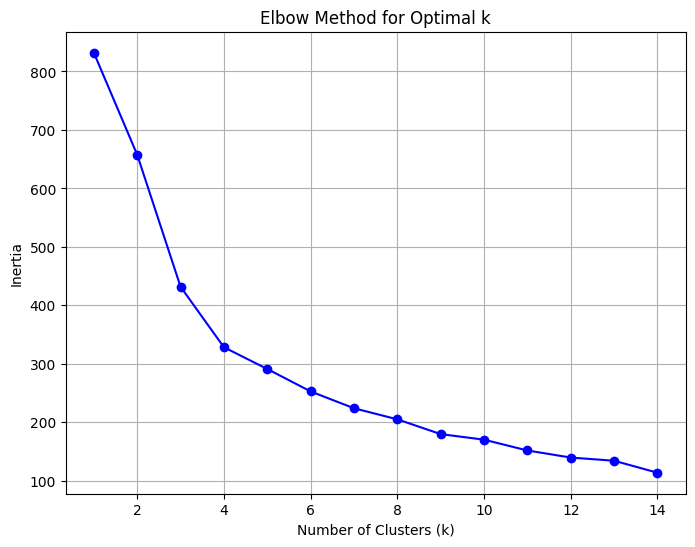

Cluster Assignment Counts:
Cluster
0    21
3    19
1     6
4     5
2     1
Name: count, dtype: int64


In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the normalized features for clustering
skill_features_normalized_array = scaler.fit_transform(skill_features.iloc[:, :-1])  # Exclude 'Cluster' column

# Elbow method for determining optimal k
inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(skill_features_normalized_array)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Fit K-means with optimal k
optimal_k = 5 # Replace this value based on elbow method observation
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(skill_features_normalized_array)

# Add cluster assignments to the skill_features DataFrame
skill_features['Cluster'] = clusters

# Display the cluster assignments
print("Cluster Assignment Counts:")
print(skill_features['Cluster'].value_counts())


# Course Curriculum Design from K-Means Clustering

* Skills are grouped into meaningful clusters using K-Means clustering results.
* Each cluster represents a distinct course, containing a set of related skills.

## Group Skills by Clusters
- Group skills by their cluster assignments to identify natural groupings.

## Design Courses
- Each cluster is converted into a course.
- Courses are sequentially numbered, with their corresponding skills listed.

## Example Output
### Course Curriculum Design:
- **Course 1**: Python, R, SQL, Pandas, NumPy
- **Course 2**: Machine Learning, TensorFlow, PyTorch, Scikit-learn
- **Course 3**: Hadoop, Spark, AWS, GCP, Kubernetes
- **Course 4**: Tableau, Power BI, Data Visualization, Matplotlib, Seaborn
- **Course 5**: Communication Skills, Teamwork, Stakeholder Communication

## Purpose
- **Skill Clustering**: Groups similar skills into logical clusters for better learning pathways.
- **Curriculum Development**: Facilitates the creation of structured courses to meet industry demands.



In [28]:
# Group skills by clusters using the index
clustered_skills = skill_features.groupby('Cluster').apply(lambda x: list(x.index))

# Design courses
courses = {}
course_id = 1
for cluster, skills in clustered_skills.items():
    if len(skills) >= 0:
        courses[f'Course {course_id}'] = skills
        course_id += 1

# Display designed courses
print("\nCourse Curriculum Design:")
for course, skills in courses.items():
    print(f"{course}: {', '.join(skills)}")



Course Curriculum Design:
Course 1: Deep Learning, TensorFlow, PyTorch, Scikit-learn, Computer Vision, Natural Language Processing, Spark, GCP, Kubernetes, Pandas, NumPy, BigQuery, Feature Engineering
Course 2: Java, Data Analytics, Data Visualization, Tableau, Power BI, AWS, MySQL, PostgreSQL, ETL Processes, Azure, Problem Solving, Cross-Functional Teams, Data Governance, Agile, Scrum, Stakeholder Communication, Business Intelligence Tools, Work Independently, Teamwork, Creativity, Strategic Thinking, Decision Making, Time Management, Adaptability, Critical Thinking
Course 3: R
Course 4: Hadoop, Airflow, Matplotlib, Seaborn, Statistical Modeling, Hypothesis Testing, Data Wrangling, Collaboration Skills
Course 5: Python, SQL, Excel, Machine Learning, Communication Skills


<ipython-input-28-8f08db380197>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_skills = skill_features.groupby('Cluster').apply(lambda x: list(x.index))


# Visualizing K-Means Clustering with PCA

* Principal Component Analysis (PCA) is used to reduce the multi-dimensional skill features to 2 dimensions for visualization.
* The scatterplot illustrates the clusters formed by the K-Means algorithm.

## Steps for Visualization

- **Dimensionality Reduction**:  
  PCA reduces the high-dimensional normalized skill features to 2 principal components.
  ```python
  pca = PCA(n_components=2)
  reduced_features = pca.fit_transform(skill_features_normalized_array)


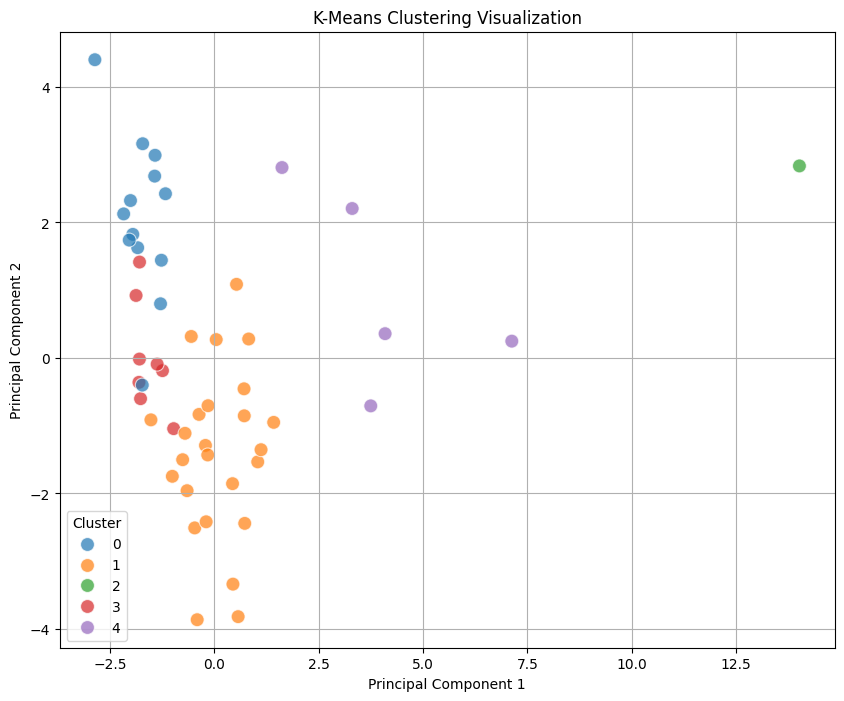

In [29]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(skill_features_normalized_array)

# Create a scatterplot with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=skill_features['Cluster'],
    palette="tab10",
    s=100,
    alpha=0.7
)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


### Manually adjust clusters before analysis

In [30]:
clustered_skills_kmean = {}
clustered_skills_kmean[0] = ['Deep Learning', 'TensorFlow', 'PyTorch', 'Scikit-learn', 'Computer Vision', 'Natural Language Processing']
clustered_skills_kmean[1] = ['Hadoop', 'Spark', 'GCP', 'Kubernetes', 'BigQuery', 'AWS', 'Azure']
clustered_skills_kmean[2] = ['Airflow', 'ETL Processes', 'MySQL', 'PostgreSQL', 'Data Wrangling', 'Feature Engineering']
clustered_skills_kmean[3] = ['Python', 'Java', 'SQL', 'R', 'Pandas', 'NumPy']
clustered_skills_kmean[4] = ['Data Visualization', 'Tableau', 'Power BI', 'Matplotlib', 'Seaborn']
clustered_skills_kmean[5] = ['Statistical Modeling', 'Hypothesis Testing', 'Problem Solving', 'Critical Thinking']
clustered_skills_kmean[6] = ['Business Intelligence Tools', 'Stakeholder Communication', 'Strategic Thinking', 'Cross-Functional Teams', 'Communication Skills']
clustered_skills_kmean[7] = ['Collaboration Skills', 'Teamwork', 'Creativity', 'Time Management', 'Adaptability']
clustered_skills_kmean[8] = ['Data Governance', 'Agile', 'Scrum', 'Work Independently', 'Decision Making']
clustered_skills_kmean[9] = ['Data Analytics', 'Excel', 'Communication Skills']


In [31]:
len(clustered_skills_kmean)
print("Number of manually adjusted clusters:",len(clustered_skills_kmean))

Number of manually adjusted clusters: 10


OpenAI api

Part2

In [ ]:
'''
import openai

# Initialize OpenAI API
openai.api_key = "apikey"

# Sample job descriptions to provide context for generating skills
job_descriptions = """
- We need a data scientist proficient in Python, machine learning, and data visualization.
- Looking for a data analyst with strong SQL and Excel skills for reporting.
- Hiring an AI engineer with experience in deep learning, computer vision, and NLP.
"""

# Ask ChatGPT to generate skills
response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are an expert in data science and artificial intelligence hiring."},
        {"role": "user", "content": f"Based on these job descriptions, suggest a list of skills required for data professionals:\n\n{job_descriptions}"}
    ]
)

# Extract and display the response
skills_from_chatgpt = response["choices"][0]["message"]["content"]
print("Skills suggested by ChatGPT API:\n", skills_from_chatgpt)
'''

Skills suggested by ChatGPT API:
 1. Python: This programming language is a fundamental requirement for most data science and AI roles due to its flexibility and comprehensive libraries for data manipulation and analysis.

2. Machine Learning: Understanding machine learning algorithms and their application is key for data scientists, especially those focusing on predictive modeling or AI tasks.

3. Data Visualizations: Skills in creating clear and compelling data visualizations to effectively communicate insights is crucial for data scientists. Knowledge of tools like Matplotlib, Seaborn, Plotly or Tableau could be necessary.

4. SQL: Structured Query Language is the standard language used to query and manipulate data stored in relational databases. A strong command of SQL is generally essential for data analyst roles.

5. Excel: Knowing how to use Excel for data manipulation, analysis, and visualization is a fundamental requirement for data analyst roles.

6. Reporting: The ability to compile, organize, analyze, and report data in a clear and concise manner is important for data analysts.

7. Deep Learning: AI engineers often need a thorough understanding of deep learning frameworks as well as the theoretical principles behind them.

8. Computer Vision: Skills in computer vision are necessary for AI engineers, particularly those focused on image recognition, object detection or similar tasks.

9. Natural Language Processing (NLP): Proficiency in NLP is important for AI engineers working with language data or developing chatbots, voice recognition systems or other conversational interfaces.

10. Programming: General programming skills are fundamental for all of these roles. This can include a wide range of languages and environments, but Python and Java are particularly common.

In addition to these, foundational knowledge of concepts like statistics, data structures, and algorithms are often important for data professionals. Other valuable skills may include the use of specific tools or environments (i.e., TensorFlow, PyTorch for AI engineers), data cleaning and preprocessing, and knowledge of cloud platforms (i.e., AWS, GCP).

Part5.1

In [ ]:
'''
import openai

# Replace with your OpenAI API key
openai.api_key = "apikey"


# Define the system and user messages
response = openai.ChatCompletion.create(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": "You are an expert in data science and artificial intelligence hiring. Your task is to create engaging descriptions and analyses for a data science program based on course curricula."
        },
        {
            "role": "user",
            "content": """
Based on the following two curriculum, write a short and compelling description for each course, highlighting the skills and their practical applications. Make the program appealing to students who aspire to enter the fields of data science, AI, and business intelligence.

### Curriculum 1 (Clustering Result 1):
Course 1: Python, R, Java, SQL, Pandas, NumPy
Course 2: Matplotlib, Seaborn, Tableau, Power BI, Data Visualization, Data Analytics
Course 3: Machine Learning, Scikit-learn, Deep Learning, TensorFlow, PyTorch
Course 4: Hadoop, Spark, Kubernetes, GCP, AWS, Azure, BigQuery
Course 5: ETL Processes, Airflow, MySQL, PostgreSQL, Feature Engineering, Data Wrangling
Course 6: Natural Language Processing, Computer Vision, Statistical Modeling, Hypothesis Testing
Course 7: Business Intelligence Tools, Stakeholder Communication, Strategic Thinking, Collaboration Skills, Communication Skills
Course 8: Decision Making, Problem Solving, Critical Thinking, Creativity, Adaptability
Course 9: Cross-Functional Teams, Agile, Scrum, Teamwork, Time Management
Course 10: Data Governance, Work Independently, Ethical Decision-Making


Please:
1. write a short description of your course curriculum that should entice potential students to enrol in this program
2. write down if there is any pre-requisite courses
3. Write a brief and engaging description for each course in the selected curriculum.
4. Highlight how the program prepares students for careers in data science, AI, and business intelligence.
"""
        }
    ]
)

# Extract and print the response text
program_description = response["choices"][0]["message"]["content"].strip()
print("Program Description:\n")
print(program_description)
'''

Program Description:

### Curriculum 1 Description

**Unlock the Future of Data Science and AI**  
Embark on a transformative journey with our comprehensive Data Science and AI program, meticulously designed to equip you with the essential skills for a thriving career in today's data-driven world. Master cutting-edge tools and techniques, from Python programming to deep learning, that are pivotal in addressing the complex challenges of industries ranging from technology to finance and beyond. Dive deep into the realm of data, uncover insights through strategic thinking, and become the linchpin of your organization with advanced business intelligence strategies. This program is your gateway to becoming a versatile data science professional, adept in both the technical and strategic aspects of the field.

**Pre-requisites:**  
A foundational understanding of programming and basic statistics is recommended to maximize the learning experience.

**Course Descriptions:**

1. **Programming Foundations (Python, R, Java, SQL, Pandas, NumPy):**  
   Lay a robust foundation with essential programming languages and libraries. Master the art of manipulating data, automating tasks, and building powerful algorithms, setting the stage for a successful data science career.

2. **Data Visualization and Analytics (Matplotlib, Seaborn, Tableau, Power BI):**  
   Transform raw data into compelling visual stories. Gain proficiency in industry-standard tools to create insightful dashboards and presentations that drive strategic decision-making.

3. **Machine Learning and Deep Learning (Scikit-learn, TensorFlow, PyTorch):**  
   Delve into machine learning and deep learning paradigms. Acquire the skills to build sophisticated models that enhance predictive capabilities and open new avenues for innovation.

4. **Big Data and Cloud Technologies (Hadoop, Spark, Kubernetes, GCP, AWS, Azure, BigQuery):**  
   Harness the power of big data frameworks and cloud computing. Learn to manage and process vast data sets efficiently, a critical skill in modern data-driven enterprises.

5. **Data Engineering (ETL Processes, Airflow, MySQL, PostgreSQL):**  
   Construct and maintain scalable data pipelines. Gain proficiency in ETL processes and databases to ensure the seamless flow and availability of data within organizations.

6. **Advanced Analytics (Natural Language Processing, Computer Vision):**  
   Explore the forefront of AI with NLP and computer vision techniques. Develop models that can interpret human language and visual data, pushing the boundaries of what machines can achieve.

7. **Business Intelligence (BI Tools, Stakeholder Communication, Strategic Thinking):**  
   Bridge the gap between data analysis and business strategy. Cultivate communication skills and strategic thinking, making you a pivotal contributor to business intelligence endeavors.

8. **Essential Soft Skills (Decision Making, Problem Solving, Critical Thinking):**  
   Enhance your adaptability and creativity with critical soft skills. Tackle the ever-changing data landscapes with confidence and innovative thinking.

9. **Team Dynamics and Project Management (Agile, Scrum, Teamwork):**  
   Excel in collaborative environments with Agile and Scrum frameworks. Master time management and teamwork, skills crucial for leading successful data projects.

10. **Data Governance and Ethics (Ethical Decision-Making):**  
    Learn to navigate the complex landscape of data governance and ethics. Ensure responsible data management practices that uphold integrity and trust.

**Program Outcomes:**  
Graduates of this program will have a competitive edge in the data science, AI, and business intelligence landscapes. Equipped with an arsenal of technical skills and a strong strategic mindset, you’ll be ready to drive data innovation and lead analytical initiatives across various industry sectors. Join us and become the future of data!

Part5.2

In [ ]:
'''
import openai

# Replace with your OpenAI API key
openai.api_key = "api key"

response = openai.ChatCompletion.create(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": "You are an expert in data science and artificial intelligence hiring. Your task is to analyze skill clusters and provide insights into their similarities and differences."
        },
        {
            "role": "user",
            "content": """
Two clustering results have been produced for a data science and AI curriculum.

### Clustering Result 1: Hierarchical Clustering
Cluster 1: Matplotlib, Seaborn
Cluster 2: Python, Machine Learning
Cluster 3: Pandas, NumPy
Cluster 4: Hadoop, Spark, Java, ETL Processes, GCP, AWS, Azure, Data Governance, Cross-Functional Teams, Communication Skills, SQL, R, Excel, Data Analytics, Power BI, Data Visualization, Tableau, Creativity, Time Management, Teamwork, Work Independently, Agile, Scrum, Decision Making, Problem Solving, Critical Thinking
Cluster 5: MySQL
Cluster 6: PostgreSQL
Cluster 7: BigQuery
Cluster 8: Collaboration Skills
Cluster 9: Adaptability
Cluster 10: Scikit-learn, Deep Learning, TensorFlow, PyTorch
Cluster 11: Computer Vision
Cluster 12: Natural Language Processing
Cluster 13: Kubernetes
Cluster 14: Airflow
Cluster 15: Statistical Modeling
Cluster 16: Feature Engineering
Cluster 17: Business Intelligence Tools
Cluster 18: Data Wrangling
Cluster 19: Strategic Thinking
Cluster 20: Hypothesis Testing
Cluster 21: Stakeholder Communication

### Clustering Result 2: K-Means Clustering
Course Curriculum Design:
Course 1: Deep Learning, TensorFlow, PyTorch, Scikit-learn, Computer Vision, Natural Language Processing, Spark, GCP, Kubernetes, Pandas, NumPy, BigQuery, Feature Engineering
Course 2: Java, Data Analytics, Data Visualization, Tableau, Power BI, AWS, MySQL, PostgreSQL, ETL Processes, Azure, Problem Solving, Cross-Functional Teams, Data Governance, Agile, Scrum, Stakeholder Communication, Business Intelligence Tools, Work Independently, Teamwork, Creativity, Strategic Thinking, Decision Making, Time Management, Adaptability, Critical Thinking
Course 3: R
Course 4: Hadoop, Airflow, Matplotlib, Seaborn, Statistical Modeling, Hypothesis Testing, Data Wrangling, Collaboration Skills
Course 5: Python, SQL, Excel, Machine Learning, Communication Skills

### Questions to Answer:
1. Analyze the similarities within each clustering result.
2. Compare the hierarchical clustering and k-means clustering results in terms of skill grouping and their practicality for curriculum design.
3. Suggest how these clusters inform the development of a logical and comprehensive sequence of courses.
"""
        }
    ]
)

# Extract and print the response text
analysis = response["choices"][0]["message"]["content"].strip()
print("Cluster Analysis and Insights:\n")
print(analysis)
'''

Cluster Analysis and Insights:

To approach this analysis, we'll start by examining the similarities within each clustering result and then compare the two methods in terms of their implications for curriculum design. Finally, I'll provide suggestions for organizing courses logically and comprehensively.

### 1. Similarities Within Each Clustering Result

#### Hierarchical Clustering:
- **Cluster 1 - Visualization Libraries:** Matplotlib and Seaborn are both Python libraries focused on data visualization, fitting well together due to their similar functionality.
- **Cluster 2 - Core Tools for Machine Learning:** Python and Machine Learning are closely linked as Python is the primary language for machine learning tasks.
- **Cluster 3 - Data Manipulation Libraries:** Pandas and NumPy are foundational libraries in Python for data handling and numerical computations, often used in tandem.
- **Cluster 4 - Breadth of Skills:** This cluster is very diverse, capturing skills from big data technologies (Hadoop, Spark), cloud platforms (GCP, AWS, Azure), programming languages, data analytics, visualization tools, to soft skills (teamwork, communication).
- **Clusters 5, 6, and 7 - Database Technologies:** MySQL, PostgreSQL, and BigQuery reflect different database management systems, suggesting a focus on database knowledge.
- **Cluster 10 - Advanced Machine Learning and AI:** Scikit-learn, Deep Learning, TensorFlow, and PyTorch are all tools related to building and deploying machine learning models.
- **Other Clusters:** Skills like computer vision, NLP, feature engineering, and various soft skills are separated into specific clusters, reflecting their niche expertise.

#### K-Means Clustering:
- **Course 1 - Advanced AI and Big Data Tools:** This course combines deep learning frameworks, cloud services, data processing (Spark), and foundational data analysis libraries.
- **Course 2 - Broad Skill Set:** Includes programming, data analytics, visualization, cloud platforms, and essential soft skills, indicating a comprehensive skill set for business intelligence and operations.
- **Course 3 - R:** Singular focus, suggesting a specialized course based on the R programming language.
- **Course 4 - Data Processing and Statistics:** This cluster features tools for big data processing (Hadoop, Airflow) and foundational statistics and data wrangling skills.
- **Course 5 - Foundational Skills and Communication:** Includes Python, SQL, Excel, and a focus on communication, hinting at integrating technical skills with interpersonal communication.

### 2. Comparison of Clustering Results

- **Hierarchical Clustering:** Provides specific and narrowly focused clusters, with a high degree of separation between technical, soft, and domain-specific skills. However, in some clusters (Cluster 4), it combines a wide array of skills, making it less practical for identifying standalone course content.
  
- **K-Means Clustering:** Offers more comprehensive groupings that could directly translate into course content. Each course covers a wider skill set which can be used to develop well-rounded courses catering to specific learning paths.
  
In terms of practicality, K-means clustering in this context seems more beneficial for curriculum design because it aligns more closely with the holistic nature of a course, combining complementary skills and tools that a learner would need to master together.

### 3. Suggestions for Course Sequence

- **Introductory Courses:** Start with "Course 5" from K-means clustering, focusing on foundational skills like Python, SQL, and communication, laying a strong base in technical and soft skills.
  
- **Intermediate Courses:** Develop intermediate courses that expand on data processing, statistical modeling, and data wrangling, pulling from Cluster 4 of hierarchical clustering and Course 4 of K-means.

- **Advanced Courses:** Offer advanced courses such as Course 1 from K-means, which involve deep learning and cloud services, to students who have mastered the basics and intermediate levels.

- **Specialized Courses:** Include focused courses on specific skill areas like "R" (Course 3), "Big Data Tools" (Clusters 5, 6, 7, and 14), and AI specializations like Cluster 10 and a computer vision or NLP capstone project.
  
- **Integration and Capstone:** Encourage integration projects that require teamwork and stakeholder communication, drawing from the breadth of skills in Cluster 4 of hierarchical clustering for real-world application.

By utilizing these clusters, curriculum designers can ensure the courses are not only logically sequenced but also comprehensive, catering to developing both technical and interpersonal skills essential for data science and AI roles.